# Lab | Cross Validation + Lab on imbalanced data (from previous day)
For this lab, we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

### Instructions
#### Apply `SMOTE` for upsampling the data

    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.
#### Apply `TomekLinks` for downsampling

    - It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.
    - You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import normaltest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeClassifier


from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import t, norm

In [2]:
churnData = pd.read_csv('Customer-Churn.csv')

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [7]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

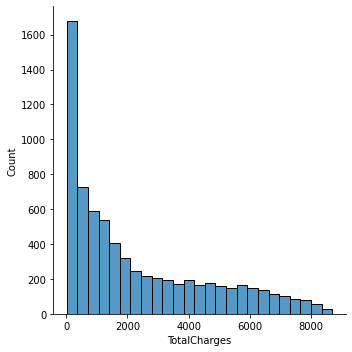

In [8]:
sns.displot(churnData['TotalCharges'])
plt.show()

In [9]:
churnData = churnData.dropna()

In [10]:
churnData['TotalCharges'].isna().sum()

0

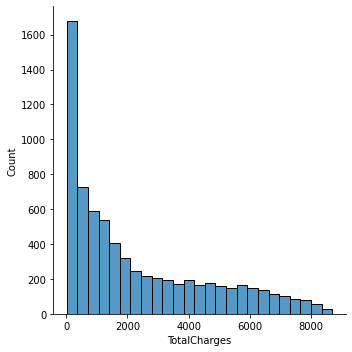

In [11]:
sns.displot(churnData['TotalCharges'])
plt.show()

In [12]:
numerical = churnData.select_dtypes(np.number)
numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformer = scaler.fit(numerical)
transformed = scaler.transform(numerical)
num_transformed = pd.DataFrame(transformed, index = numerical.index, columns = numerical.columns )
display(num_transformed.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,0.000000,0.115423,0.001275
1,0.0,0.464789,0.385075,0.215867
2,0.0,0.014085,0.354229,0.010310
3,0.0,0.619718,0.239303,0.210241
4,0.0,0.014085,0.521891,0.015330


In [14]:
num_transformed.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [15]:
categorical = churnData.select_dtypes(np.object)
categorical.drop(columns = ['Churn'], axis = 0, inplace = True)
categorical

/home/annast/.local/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month


In [16]:
categorical = pd.get_dummies(categorical)


In [17]:
X = pd.concat([num_transformed, categorical], axis = 1)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0.0,0.000000,0.115423,0.001275,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0.0,0.464789,0.385075,0.215867,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,0.0,0.014085,0.354229,0.010310,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0.0,0.619718,0.239303,0.210241,0,1,1,0,1,0,...,1,1,0,0,1,0,0,0,1,0
4,0.0,0.014085,0.521891,0.015330,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.323944,0.662189,0.227521,0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
7039,0.0,1.000000,0.845274,0.847461,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7040,0.0,0.140845,0.112935,0.037809,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7041,1.0,0.042254,0.558706,0.033210,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0


In [18]:
y = churnData['Churn']
churnData.drop(columns = ['Churn'], axis = 0, inplace = True)


The accuracy of the logistic_regression model is: 0.80 
[[1418  133]
 [ 291  268]]


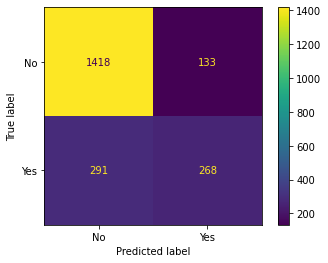

The Kappa of your model is: 0.43
              precision    recall  f1-score   support

         Yes       0.67      0.48      0.56       559
          No       0.83      0.91      0.87      1551

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



In [19]:
X_train, X_test, y_train, y_test = train_test_split(num_transformed, y, test_size=0.3, random_state = 10)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

The accuracy of the logistic_regression model is: 0.80 
[[1379  172]
 [ 247  312]]


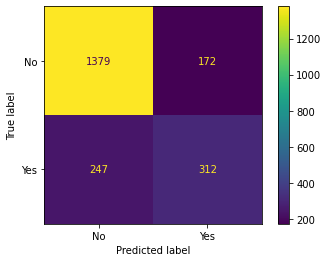

The Kappa of your model is: 0.47
              precision    recall  f1-score   support

         Yes       0.64      0.56      0.60       559
          No       0.85      0.89      0.87      1551

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

## Managing imbalance in the dataset

In [21]:
y.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

## Downsampling

#### With only numericals

In [22]:
data = pd.concat([num_transformed, y], axis = 1)
category_0 = data[data['Churn'] == 'No']
category_1 = data[data['Churn'] == 'Yes']

# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

(1869, 5)
(1869, 5)


No     1869
Yes    1869
Name: Churn, dtype: int64

In [23]:
dep = data['Churn']
X = data.drop(columns = ['Churn'], axis = 1, inplace = False)

The accuracy of the logistic_regression model is: 0.73 
[[382 177]
 [124 439]]


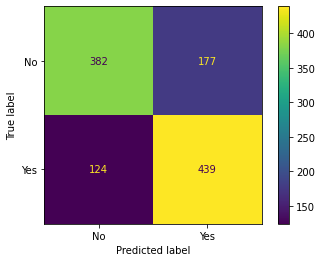

The Kappa of your model is: 0.46
              precision    recall  f1-score   support

         Yes       0.71      0.78      0.74       563
          No       0.75      0.68      0.72       559

    accuracy                           0.73      1122
   macro avg       0.73      0.73      0.73      1122
weighted avg       0.73      0.73      0.73      1122



In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, dep, test_size=0.3, random_state = 10)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

#### Numericals + categoricals dummified

In [25]:
Down_X = pd.concat([num_transformed, categorical], axis = 1)
data = pd.concat([Down_X, y], axis = 1)
category_0 = data[data['Churn'] == 'No']
category_1 = data[data['Churn'] == 'Yes']

# We pick a random sample of rows from of observations belonging to "category_0"
# in the same amount of observations belonging to "category_1"
category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

(1869, 34)
(1869, 34)


No     1869
Yes    1869
Name: Churn, dtype: int64

In [26]:
dep = data['Churn']
X_dwn = data.drop(columns = ['Churn'], axis = 1, inplace = False)

The accuracy of the logistic_regression model is: 0.74 
[[400 195]
 [102 425]]


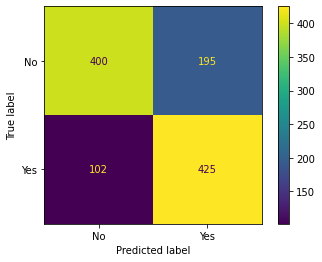

The Kappa of your model is: 0.47
              precision    recall  f1-score   support

         Yes       0.69      0.81      0.74       527
          No       0.80      0.67      0.73       595

    accuracy                           0.74      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.74      0.74      0.73      1122



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_dwn, dep, test_size=0.3, random_state = 10)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

# Upsampling

#### With only numericals

In [28]:
data = pd.concat([num_transformed, y], axis = 1)
category_0_os = data[data['Churn'] == 'No']
category_1_os = data[data['Churn'] == 'Yes']

# Upsampling 
# As we are going to repeat observations, the random samples can be picked more then once,
# threfore we need to use the keyword: replace=True
category_1 = category_1_os.sample(len(category_0_os), replace=True)  
print(category_1.shape)

data_os = pd.concat([category_0_os, category_1], axis=0)
#shuffling the data
data_os = data_os.sample(frac=1)
print(data_os['Churn'].value_counts())


(5163, 5)
Yes    5163
No     5163
Name: Churn, dtype: int64


In [29]:
dep = data_os['Churn']
X = data_os.drop(columns = ['Churn'], axis = 1, inplace = False)

The accuracy of the logistic_regression model is: 0.74 
[[1144  423]
 [ 385 1146]]


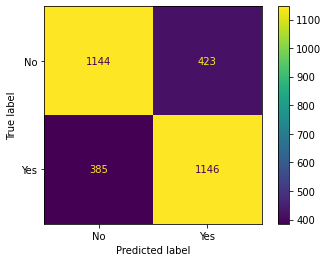

The Kappa of your model is: 0.48
              precision    recall  f1-score   support

         Yes       0.73      0.75      0.74      1531
          No       0.75      0.73      0.74      1567

    accuracy                           0.74      3098
   macro avg       0.74      0.74      0.74      3098
weighted avg       0.74      0.74      0.74      3098



In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, dep, test_size=0.3, random_state = 10)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

#### Numericals + categoricals dummified

In [31]:
Up_data = pd.concat([num_transformed, categorical, y], axis = 1)
category_0_os = Up_data[Up_data['Churn'] == 'No']
category_1_os = Up_data[Up_data['Churn'] == 'Yes']

# Upsampling 
# As we are going to repeat observations, the random samples can be picked more then once,
# threfore we need to use the keyword: replace=True
category_1 = category_1_os.sample(len(category_0_os), replace=True)  
print(category_1.shape)

data_os = pd.concat([category_0_os, category_1], axis=0)
#shuffling the data
data_os = data_os.sample(frac=1)
print(data_os['Churn'].value_counts())

(5163, 34)
Yes    5163
No     5163
Name: Churn, dtype: int64


In [32]:
dep_up = data_os['Churn']
X_up = data_os.drop(columns = ['Churn'], axis = 1, inplace = False)

The accuracy of the logistic_regression model is: 0.76 
[[1100  436]
 [ 311 1251]]


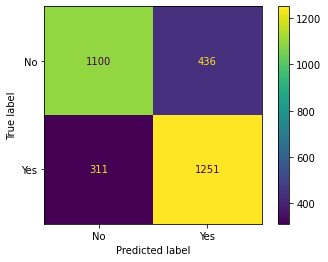

The Kappa of your model is: 0.52
              precision    recall  f1-score   support

         Yes       0.74      0.80      0.77      1562
          No       0.78      0.72      0.75      1536

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098



In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_up, dep_up, test_size=0.3, random_state = 10)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

# SMOTE oversampling + decision tree model

#### With only numericals

In [34]:
data_smote = pd.concat([num_transformed, y], axis = 1)
smote = SMOTE()
y_smote = data_smote['Churn']
X_smote = data.drop(['Churn'], axis=1)
X_sm, y_sm = smote.fit_sample(X_smote, y_smote)

unique, counts = np.unique(y_sm, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 5163]
 ['Yes' 5163]]


The accuracy of the logistic_regression model is: 0.73 
[[1129  396]
 [ 426 1147]]


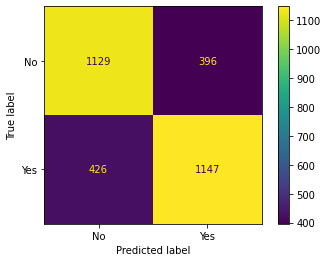

The Kappa of your model is: 0.47
              precision    recall  f1-score   support

         Yes       0.74      0.73      0.74      1573
          No       0.73      0.74      0.73      1525

    accuracy                           0.73      3098
   macro avg       0.73      0.73      0.73      3098
weighted avg       0.73      0.73      0.73      3098



In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state = 10)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

#### Decision Tree Model

The accuracy of the model is: 0.75
[[1300  399]
 [ 450 1259]]


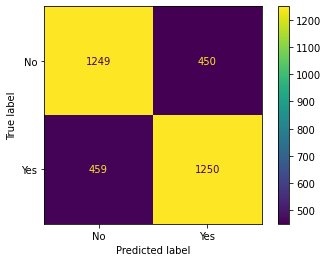

The Kappa of your model is: 0.50
              precision    recall  f1-score   support

         Yes       0.76      0.74      0.75      1709
          No       0.74      0.77      0.75      1699

    accuracy                           0.75      3408
   macro avg       0.75      0.75      0.75      3408
weighted avg       0.75      0.75      0.75      3408



In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

### Numericals + categoricals dummified

In [37]:
data_smote = pd.concat([num_transformed, categorical, y], axis = 1)
smote = SMOTE()
y_smote = data_smote['Churn']
X_smote = data.drop(['Churn'], axis=1)
X_sm, y_sm = smote.fit_sample(X_smote, y_smote)

unique, counts = np.unique(y_sm, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 5163]
 ['Yes' 5163]]


#### Logistic regression model

The accuracy of the logistic_regression model is: 0.73 
[[1120  405]
 [ 433 1140]]


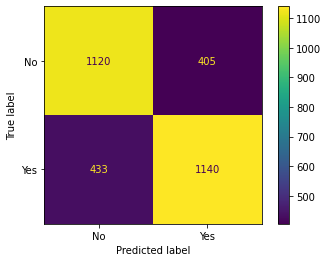

The Kappa of your model is: 0.46
              precision    recall  f1-score   support

         Yes       0.74      0.72      0.73      1573
          No       0.72      0.73      0.73      1525

    accuracy                           0.73      3098
   macro avg       0.73      0.73      0.73      3098
weighted avg       0.73      0.73      0.73      3098



In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state = 10)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

#### Decision tree model

The accuracy of the model is: 0.75
[[1285  430]
 [ 415 1278]]


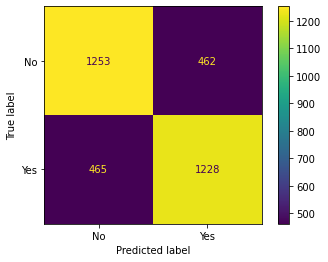

The Kappa of your model is: 0.50
              precision    recall  f1-score   support

         Yes       0.75      0.75      0.75      1693
          No       0.76      0.75      0.75      1715

    accuracy                           0.75      3408
   macro avg       0.75      0.75      0.75      3408
weighted avg       0.75      0.75      0.75      3408



In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

## Cross validation

In [40]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()


In [41]:
model_pipeline = [model1, model2]
model_names = ['Decision Tree Classifier', 'Logistic Regression']
def confidence_intervals(model_pipeline, model_names, X_train, y_train, significance = 0.05, K = 10):
    scores = {}
    i=0
    for model in model_pipeline:
        mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=K))
        if (K < 30):
            t_critical = abs(t.ppf(significance, K-1))
            interval = t_critical*(np.std(cross_val_score(model, X_train, y_train, cv=K))/np.sqrt(K))
        else:
            z_critical = abs(norm.ppf(1-significance/2))
            interval = z_critical*(np.std(cross_val_score(model, X_train, y_train, cv=K))/np.sqrt(K))
        scores[model_names[i]] = [mean_score, mean_score - interval, mean_score + interval]
        print("The rmse of the {} model is (CV witk K={}) {:4.2f} +/- {:4.2f}".format(model_names[i], K, mean_score, interval))
        i = i+1
confidence_intervals(model_pipeline, model_names, X_sm, y_sm, 0.01, 7)

The rmse of the Decision Tree Classifier model is (CV witk K=7) 0.77 +/- 0.04
The rmse of the Logistic Regression model is (CV witk K=7) 0.73 +/- 0.01


## Tomek's Links

#### With only numericals

In [42]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X_smote, y_smote)

unique, counts = np.unique(y_tl, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 4641]
 ['Yes' 1869]]


/home/annast/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The accuracy of the logistic_regression model is: 0.80 
[[1266  133]
 [ 258  296]]


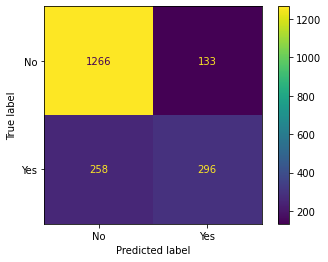

The Kappa of your model is: 0.47
              precision    recall  f1-score   support

         Yes       0.69      0.53      0.60       554
          No       0.83      0.90      0.87      1399

    accuracy                           0.80      1953
   macro avg       0.76      0.72      0.73      1953
weighted avg       0.79      0.80      0.79      1953



In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state = 10)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

#### Decision tree model

The accuracy of the model is: 0.75
[[1272  263]
 [ 277  337]]


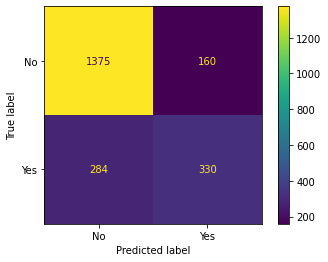

The Kappa of your model is: 0.38
              precision    recall  f1-score   support

         Yes       0.56      0.55      0.56       614
          No       0.82      0.83      0.82      1535

    accuracy                           0.75      2149
   macro avg       0.69      0.69      0.69      2149
weighted avg       0.75      0.75      0.75      2149



In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

### Numericals + categoricals dummified

In [45]:
tl = TomekLinks('majority')

data_full_tomek = pd.concat([num_transformed, categorical], axis = 1)
X_tl, y_tl = tl.fit_sample(data_full_tomek, y)

unique, counts = np.unique(y_tl, return_counts=True)
print(np.asarray((unique, counts)).T)

/home/annast/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


[['No' 4580]
 ['Yes' 1869]]


The accuracy of the logistic_regression model is: 0.81 
[[1202  162]
 [ 198  373]]


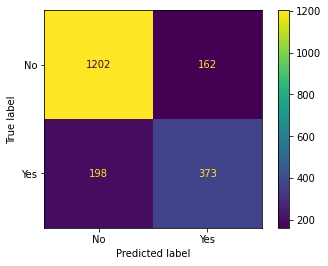

The Kappa of your model is: 0.54
              precision    recall  f1-score   support

         Yes       0.70      0.65      0.67       571
          No       0.86      0.88      0.87      1364

    accuracy                           0.81      1935
   macro avg       0.78      0.77      0.77      1935
weighted avg       0.81      0.81      0.81      1935



In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state = 10)
classification = LogisticRegression(random_state=0, solver='lbfgs',  max_iter=500).fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

#### Decision tree model

The accuracy of the model is: 0.75
[[1236  257]
 [ 270  366]]


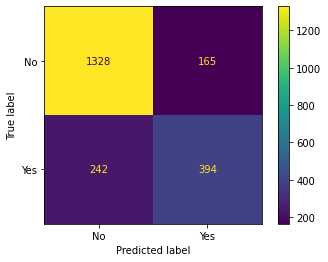

The Kappa of your model is: 0.41
              precision    recall  f1-score   support

         Yes       0.59      0.58      0.58       636
          No       0.82      0.83      0.82      1493

    accuracy                           0.75      2129
   macro avg       0.70      0.70      0.70      2129
weighted avg       0.75      0.75      0.75      2129



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

In [48]:
confidence_intervals(model_pipeline, model_names, X_tl, y_tl, 0.01, 7)

The rmse of the Decision Tree Classifier model is (CV witk K=7) 0.75 +/- 0.02
The rmse of the Logistic Regression model is (CV witk K=7) 0.81 +/- 0.01


### Conclusion
#### The best model performance is with having full dataset (categoricals dummified), SMOTE oversampling and training a Decision Tree Clessifier: 
`kappa-score 0,5
recall : 'Yes' - 0,75
         'No' - 0,75`